# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
data = pd.read_csv('weight-height.csv')
data.head(5)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == "Female"]

print('Male height mean:', male_df.Height.mean())
print('Male height standard deviation:', male_df.Height.std())      

print('Male weight mean:', male_df.Weight.mean())
print('Male weight standard deviation:' ,male_df.Weight.std())   

print('Female height mean:', female_df.Height.mean())
print('Female height standard deviation:' ,female_df.Height.std())      

print('Female weight mean:', female_df.Weight.mean())
print('Female weight standard deviation:' ,female_df.Weight.std())  


# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male height mean: 69.02634590621737
Male height standard deviation: 2.8633622286606517
Male weight mean: 187.0206206581929
Male weight standard deviation: 19.781154516763813
Female height mean: 63.708773603424916
Female height standard deviation: 2.696284015765056
Female weight mean: 135.8600930074687
Female weight standard deviation: 19.022467805319007


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

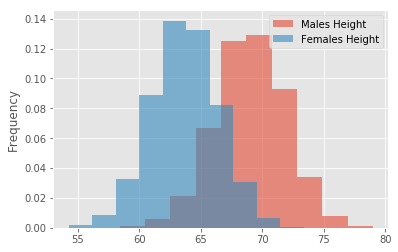

In [23]:
male_df['Height'].plot.hist(bins=10, density = True, alpha=.6, label='Males Height')
female_df['Height'].plot.hist(bins=10, density = True, alpha=.6, label='Females Height')

plt.legend()
plt.show()

In [8]:
# Record your observations - are these inline with your personal observations?

# Males tend to me a few inches taller than females, consistent with my experience.
# Both male and female heights appear to be roughly normaly distributed

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

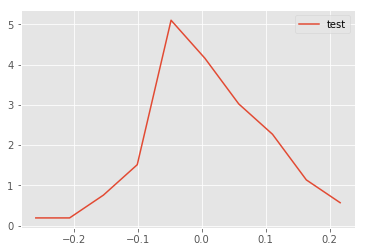

array([ 0.04412275, -0.03308702,  0.24307712, -0.02520921,  0.01096098,
        0.15824811, -0.09092324, -0.05916367,  0.01876032, -0.032987  ,
       -0.11927646, -0.02048765, -0.03588289,  0.06034716, -0.16647885,
       -0.0700179 ,  0.1151391 ,  0.1857331 , -0.15111796,  0.06448475,
       -0.09806079, -0.08568532, -0.08718792, -0.04225079,  0.09964398,
        0.07124213,  0.00591442, -0.03633109,  0.00032888, -0.01059304,
        0.07930533, -0.06315716, -0.00061949, -0.01010676, -0.00523082,
        0.02492177,  0.01976601,  0.13348486, -0.00868756,  0.15615323,
       -0.0305853 , -0.04777314,  0.01007382,  0.03554385,  0.02696124,
        0.12919634,  0.1139343 ,  0.04944404, -0.03363363, -0.01006143,
        0.1413398 ,  0.02212541, -0.13107731, -0.06895652, -0.05775132,
        0.11522048, -0.0107164 ,  0.22601068,  0.06566195,  0.01248068,
       -0.04357039,  0.09721793, -0.02407111, -0.08241235,  0.05681327,
        0.00127583,  0.11890607, -0.00735933, -0.2859688 ,  0.07

In [18]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for i in range(n.size):
        pdfx[i] = 0.5*(bins[i] + bins[i+1])
        pdfy[i] = n[i]
        
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()
plt.show()
s

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

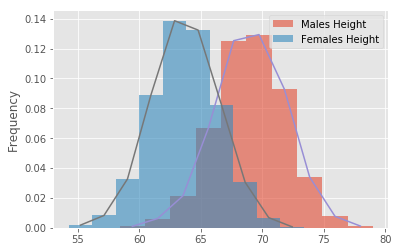

In [24]:
male_df['Height'].plot.hist(bins=10, density = True, alpha=.6, label='Males Height')
female_df['Height'].plot.hist(bins=10, density = True, alpha=.6, label='Females Height')

plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

#### Repeat above exerice for male and female weights

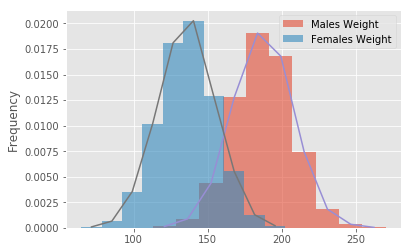

In [25]:
male_df['Weight'].plot.hist(bins=10, density = True, alpha=.6, label='Males Weight')
female_df['Weight'].plot.hist(bins=10, density = True, alpha=.6, label='Females Weight')

plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

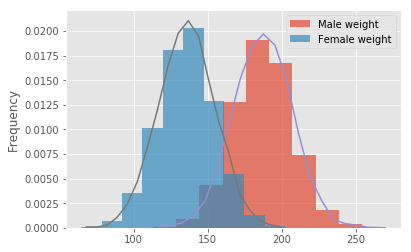

#### Write your observations in the cell below.

In [27]:
# Record your observations - are these inline with your personal observations?
# Male weights tend to be 40-50 lbs higher than females, matching my personal experience.
# Both weights appear to be normally distributed.


# So whats the takeaway when comparing male and female heights and weights 
# Men are typically taller and heavier than women.
# There is more differentiation in weight than in height.


#### Repeat Above experiments in seaborn and compare with your results. 

/Users/giovanni/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


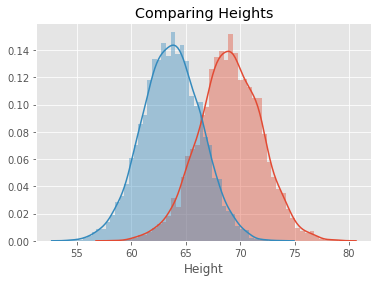

In [33]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
# plt.legend()  # ???
plt.show()

/Users/giovanni/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


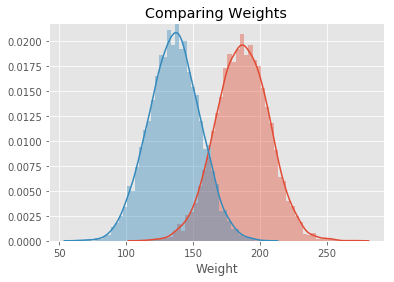

In [32]:
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Weights')
plt.show()

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

# Seaborn is using much smaller bin sizes.
# Seaborn is smoothing the distribution curve more
# Seaborn is much easier to implement.

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.